Hi all, In this NoteBook I am exploring all the insite of student data set using different plots

In [54]:
# Import all the required liberary
import pandas as pd # load the data
import numpy as np # math operation if needed
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [55]:
def load_csv(df):
    df = pd.read_csv('D:\Data Science\Visualization Project\Dataset\StudentsPerformance.csv',nrows=500)
    return df

In [56]:
df = load_csv(r'D:\Data Science\Visualization Project\Dataset\StudentsPerformance.csv')

In [57]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
495,male,group D,high school,standard,completed,68,64,66
496,female,group C,some college,standard,none,54,48,52
497,female,group D,some college,free/reduced,completed,59,78,76
498,female,group B,some high school,standard,none,66,69,68


From my observation we can see that there are 8 different columns namely gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'math score', 'reading score','writing score' and this whole dataset is about how the student preform durning there course.

1. gender --> Male or female
2. race/ethnicity --> Student into different groups
3. parental level of education --> How much parents have been studies
4. lunch --> offered by school
5. test preparation course --> Taken coure regaring the test or not
6. math score, reading score, writing score --> score 

In [58]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

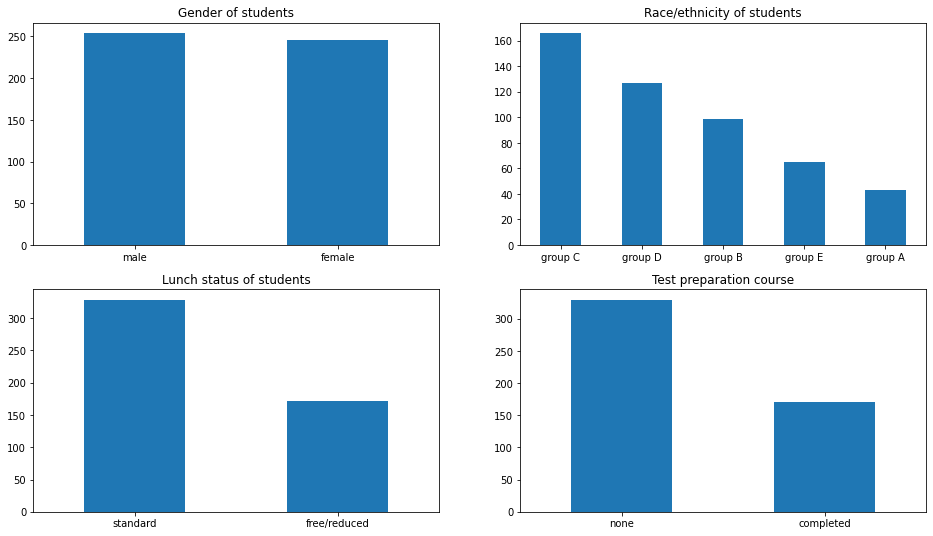

In [59]:
plt.subplot(221)

df['gender'].value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students')

plt.xticks(rotation=0)

plt.subplot(223)

df['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')

plt.xticks(rotation=0)

plt.subplot(224)

df['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course')

plt.xticks(rotation=0)

plt.show()

We can infer many things from the graph. There are more girls in the school than boys. The majority of the students belong to groups C and D. More than 60% of the students have a standard lunch at school. Also, more than 60% of students have not taken any test preparation course.

<AxesSubplot:>

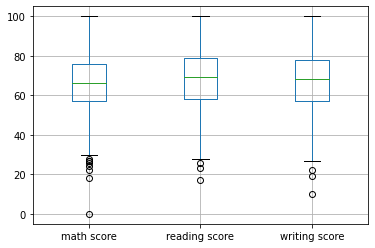

In [60]:
df.boxplot()

The middle portion represents the inter-quartile range (IQR). The horizontal green line in the middle represents the median of the data. The hollow circles near the tails represent outliers in the dataset. However, since it is very much possible for a student to score extremely low marks in a test, we will not remove these outliers.

c:\Users\mksmu\miniconda3\envs\db\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='math score', ylabel='Density'>

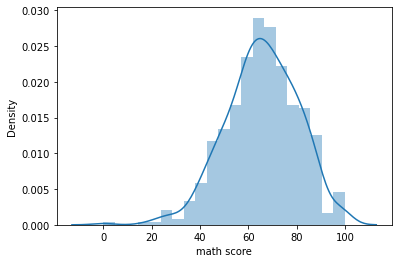

In [61]:
sns.distplot(df['math score'])

The graph represents a perfect bell curve closely. The peak is at around 65 marks, the mean of the math score of the students in the dataset. A similar distribution plot can also be made for reading scores and writing scores.

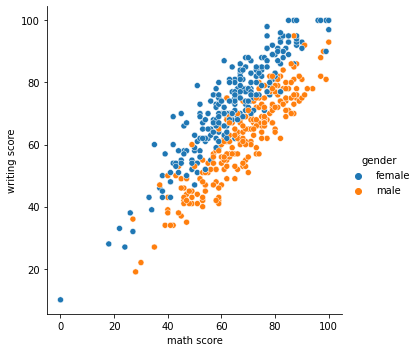

In [62]:
sns.relplot(x='math score', y='writing score', hue='gender', data=df)

The graph shows a clear difference in scores between the male and female students. For the same math score, female students are more likely to have a higher writing score than male students. However, for the same writing score, male students are expected to have a higher math score than female students.

To explore more i am transforming all the data

In [63]:
df['gender'].value_counts()

male      254
female    246
Name: gender, dtype: int64

In [64]:
df['gender'] = df['gender'].map({'male':0,
                                 'female':1})

In [65]:
df['race/ethnicity'].value_counts()

group C    166
group D    127
group B     99
group E     65
group A     43
Name: race/ethnicity, dtype: int64

In [66]:
df['race/ethnicity'] = df['race/ethnicity'].map({'group A': 0,
                                                 'group B': 1,
                                                 'group C': 2,
                                                 'group D': 3,
                                                 'group E': 4})

In [67]:
df['parental level of education'].value_counts()

associate's degree    120
some college          116
some high school       91
high school            88
bachelor's degree      58
master's degree        27
Name: parental level of education, dtype: int64

In [68]:
df['parental level of education'] = df['parental level of education'].map({"associate's degree":0,
                                                                           'some college':1,
                                                                           'some high school' : 2,
                                                                           'high school': 3,
                                                                           "bachelor's degree":4,
                                                                           "master's degree" : 5})

In [69]:
df['lunch'].value_counts()

standard        328
free/reduced    172
Name: lunch, dtype: int64

In [70]:
df['lunch'] = df['lunch'].map({'standard':0,
                               'free/reduced':1})

In [71]:
df['test preparation course']=df['test preparation course'].map({'none':0,'completed':1})

In [72]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [73]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,4,0,0,72,72,74
1,1,2,1,0,1,69,90,88
2,1,1,5,0,0,90,95,93
3,0,0,0,1,0,47,57,44
4,0,2,1,0,0,76,78,75


NOTE: TO EXPLORE MORE I WILL ONLY BE USING PLOTLY LIBERARY

In [74]:
import plotly.express as px
fig = px.scatter(df, x="math score", y="reading score", color="gender")
fig.show()


In [78]:
fig = px.scatter(df, x="math score", y="reading score",symbol='gender')
fig.show()


In [81]:
fig = px.scatter(df, x="writing score", y="reading score", color="gender")
fig.show()

In [82]:
fig = px.bar(df, x='gender', y='race/ethnicity')
fig.show()

In [84]:
fig = px.bar(df, x='gender', y='parental level of education',title="Long-Form Input")
fig.show()